In [22]:
### import das bibliotecas ###
import numpy as np 
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [4]:
### import do dataset com as ações da S&P 500 ###
data = pd.read_csv("all_stocks_5yr.csv",index_col=0)

In [5]:
data.head(3)

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL


In [6]:
lista_empresas = ["NFLX","AAL","MSFT","GOOG","ORCL","MNST","MMM"]
# NFLX --> Netflix
# AAL --> America Airlines
# MSFT --> Microsoft
# GOOG --> Google
# ORCL --> Oracle
# MNST --> Monster
# MMM --> 3M

In [7]:
### importe das ações ###
for empresa in lista_empresas:
     globals()[empresa]  = data.loc[data["Name"]==empresa]

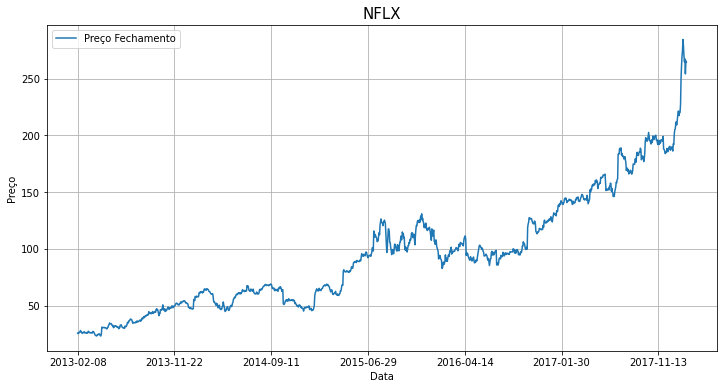

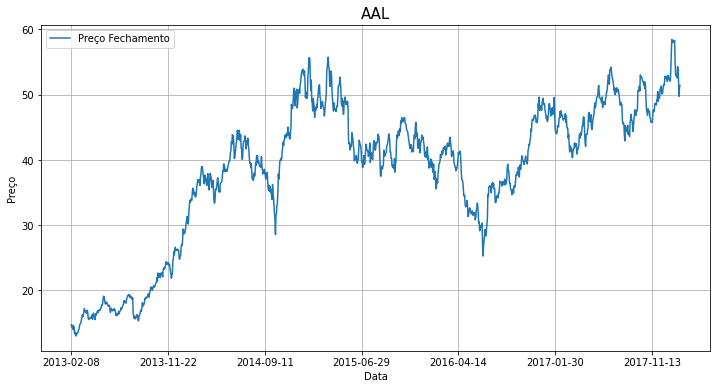

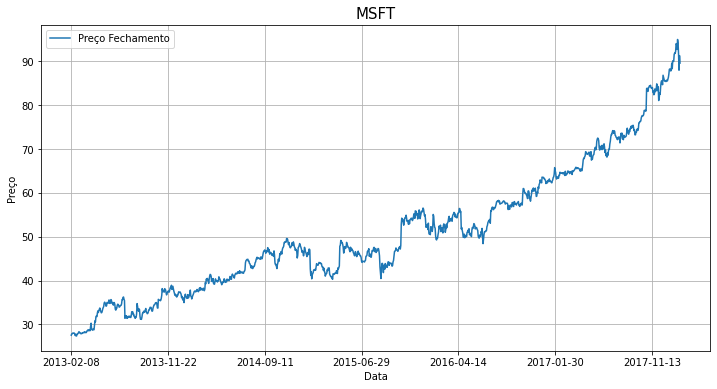

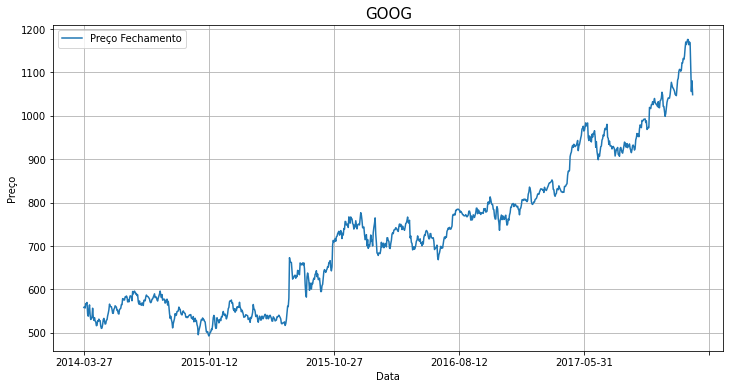

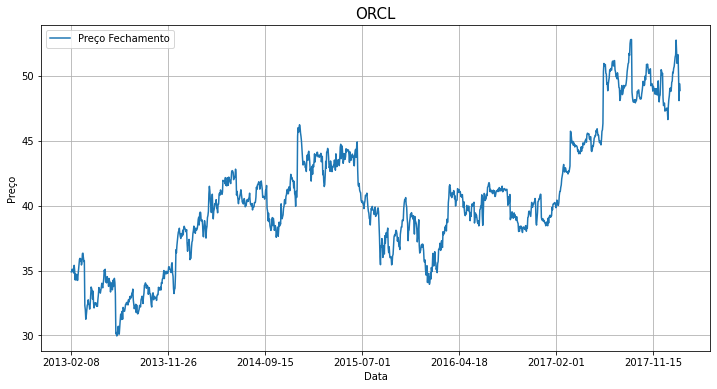

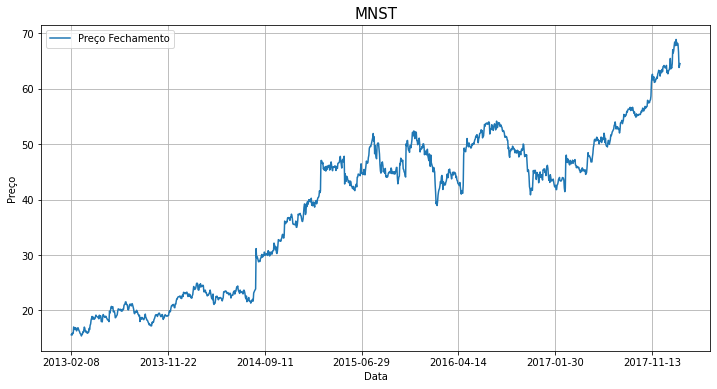

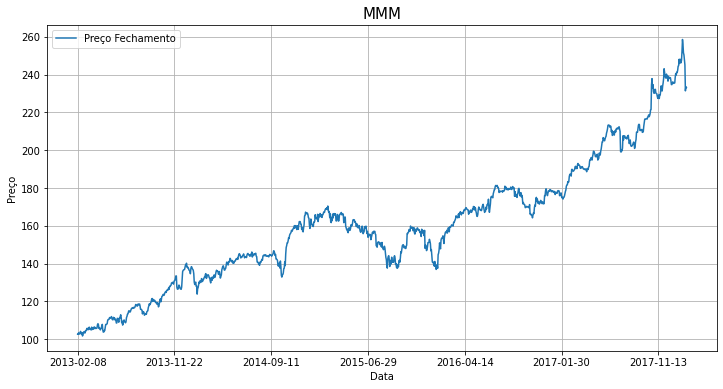

In [8]:
for empresa in lista_empresas:
    plt.figure(figsize=(12, 6))
    globals()[empresa]['close'].plot( label='Preço Fechamento')
    plt.xlabel('Data')
    plt.ylabel('Preço')
    plt.title(empresa, size = 15)
    plt.legend()
    plt.grid()
    plt.show()

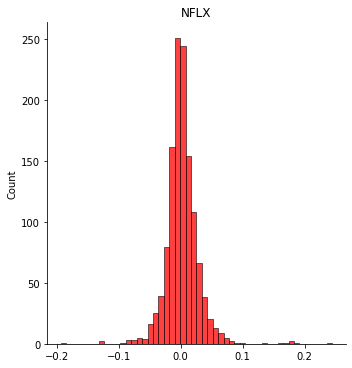

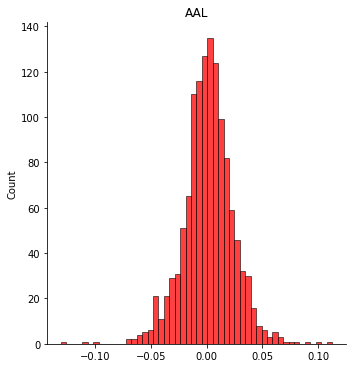

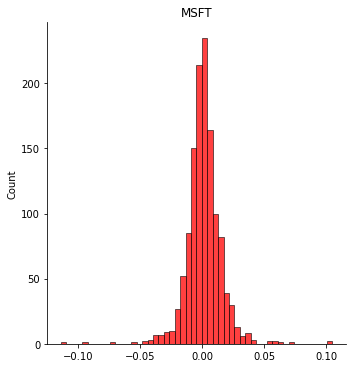

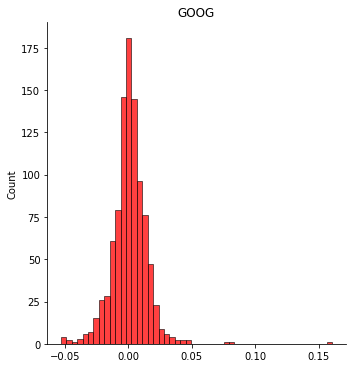

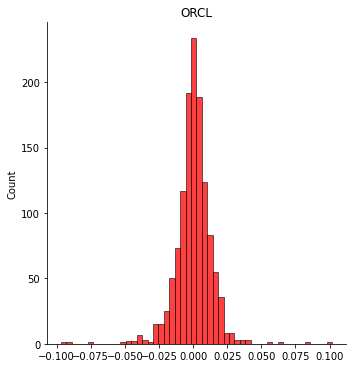

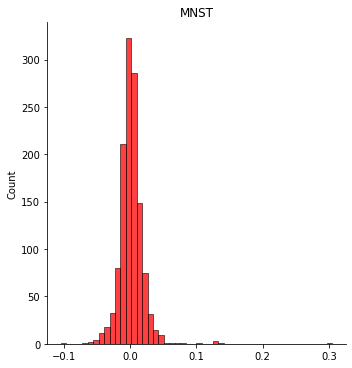

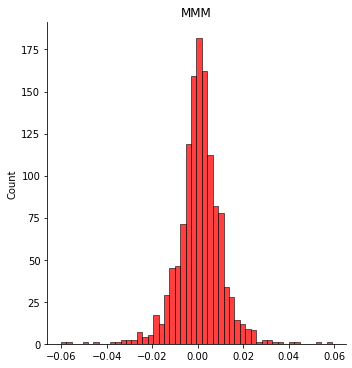

In [11]:
### cálculo da diferença percentual entre os dias ###
# distribuição do retorno diario das ações #
for empresa in lista_empresas:
    globals()[empresa]['daily_var_'+empresa] = globals()[empresa]['close'].pct_change()
    sns.displot(list(globals()[empresa]['daily_var_'+empresa].values), 
                bins=50, color='red')
    plt.title(empresa)
    plt.show()

In [12]:
### criar dataset com os retornos percentuais diários das ações ###
df_ret = pd.DataFrame(index=data.index.unique())
for empresa in lista_empresas:
    df_ret = df_ret.merge(globals()[empresa]["daily_var_" + empresa], 
                          left_index=True, 
                          right_index=True, 
                          how='left')

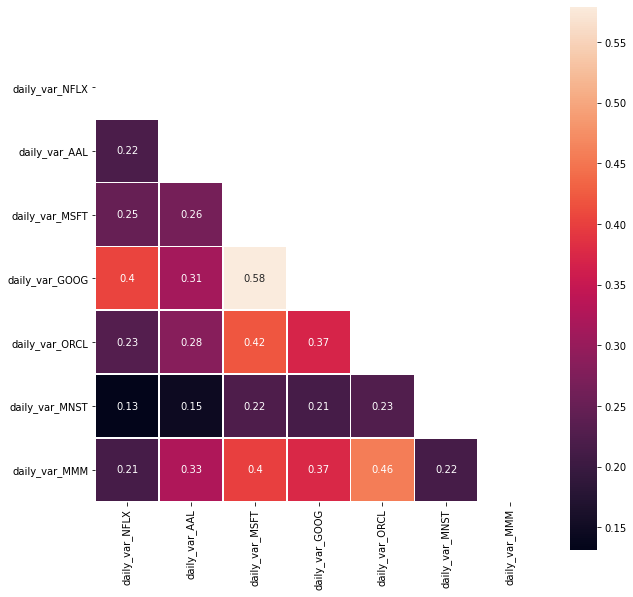

In [13]:
### mapa da correlação de pearson entre as variações diárias entre as empresas ###
# as maiores correlações são entre empresas do mesmo ramo(tecnologia) Google x Microsoft
corr = df_ret.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [21]:
### estastísticas do comportamento histórico das ações ###

# média das variações diárias #
media = df_ret["daily_var_AAL"].mean() 
var = df_ret["daily_var_AAL"].var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = df_ret["daily_var_AAL"].std() #Standard deviation of the log return


t_intervals = 60 #I just wanted to forecast 250 time points
iterations = 10 #I wanted to have 10 different forecast

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price